In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Enable inline plotting  
%matplotlib inline

In [2]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Numpy version 1.16.4


In [3]:
data1 = 'df7-comm-updated-rmsd-traj-split-chain-reader-GA.csv'
data2 = 'df7-comm-updated-rmsd-traj-split-chain-reader.csv'

data0 = "df7-comm-updated-rmsd-traj-split.csv"

In [8]:
df7_ga = pd.read_csv(data1)
df7_mpi = pd.read_csv(data2)

df7_0 = pd.read_csv(data0)

In [9]:
# colors for HPC machines
color = {'comet': sns.color_palette()[0],
         'supermic': sns.color_palette()[1],
         'bridges': sns.color_palette()[2],
        }

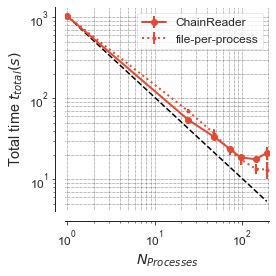

In [16]:
plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)


#df7_ga.plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label='ga')
df7_mpi.plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, 
            marker='o', lw=2, color=color["comet"], linestyle="-",
            label='ChainReader')
df7_0.plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, 
            marker='.', lw=2, color=color["comet"], linestyle=":",
            label='file-per-process')

ax.set_xlabel('$N_{Processes}$')    
ax.set_ylabel('Total time $t_{total}(s)$')

ax.loglog([1, 192], [df7_mpi['t_tot_max'][0], df7_mpi['t_tot_max'][0]/192.], '--',color='black')
plt.yscale('log')
plt.xscale('log')
ax.set_xlim(0.95, 205)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')       
ax.legend(loc='upper right')
ax.legend().set_visible(True)

sns.despine(offset=10, ax=ax)
#lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.23), frameon=False, fancybox=True, shadow=True, ncol=3)
plt.tight_layout() 
fig_name = 'Comparison_tot_time_traj_splitting_chain-reader'
# fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('{}.pdf'.format(fig_name), bbox_inches='tight')